# AppScrip
### Data science Assignment - 2
#### Type of Machine learning Problem
There are multiple Categories of news that need to classify => Multi class classification problem

#### Machine Learning Objectives and Constraints:
- __Objective__- Predict the probability of each data-point belonging to the respective categories
- __Constraints__- 
1. Class probabilities.
2. Penalize the errors in class probabilites

### Train and test Dataset
Split the dataset randomly into three parts train, cross validation and test with 64%, 16%, 20% of data respectively

## Exploratory Data Analysis

In [1]:
import os
os.chdir('D:\\Projects\\AppScrip')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords as Stopwords
from wordcloud import WordCloud
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
#probability density function and cumulative density function
def pdf_cdf(data,col):
    print(data[col].describe())
    unique_var = data[col].value_counts()
    s = sum(unique_var.values)
    h = unique_var.values/s
    c = np.cumsum(h)
    plt.figure(1)
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(h,label = 'Histogram')
    #plt.xlabel('Index numbers')
    plt.ylabel('Number of Occurances')
    plt.grid()
    plt.legend()
    plt.subplot(222)
    plt.plot(c,label = 'Cumulative distribution')
    plt.grid()
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('newsorg.csv', header = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
title          100000 non-null object
description    95700 non-null object
category       100000 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [4]:
df.head()

,title,description,category
0,Kiara Advani is a vision in white plunging nec...,Kiara Advani's fashion game has been on point ...,entertainment
1,Pankhuri Awasthy on doing Yeh Rishta Kya Kehla...,Pankhuri Awasthy is all set to make a comeback...,entertainment
2,Posters for Ekta Kapoor's Mangalyaan Series Do...,One poster shows the show’s protagonists flank...,entertainment
3,"Sonakshi Sinha’s new film gets a title, Khanda...","Directed by Shilpi Dasgupta, Sonakshi Sinha’s ...",entertainment
4,Is Samantha Doing Another Cameo For Akkinenis?...,Already Samantha has acted in Nagarjuna's Raju...,entertainment


In [5]:
#Checking the missing value
df.isna().sum()/df.shape[0]

title          0.000
description    0.043
category       0.000
dtype: float64

In [6]:
df = df.dropna(axis=0, how = 'any')

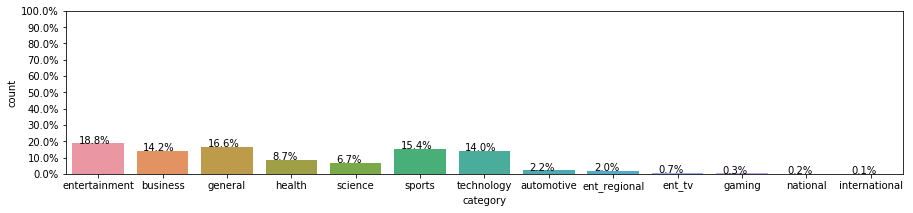

In [7]:
total = len(df)
plt.figure(figsize=(15,3))
ax = sns.countplot(x = 'category', data = df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total),(p.get_x()+0.1, p.get_height()+5))
ax.yaxis.set_ticks(np.linspace(0,total,11))   
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

In [8]:
category_list = df.category.unique()
category_encode = {}
for i in range(len(category_list)):
    category_encode[category_list[i]] = i
df.category = df.category.replace(category_encode)

In [ ]:
category_encode2 = {{'entertainment': 0,'business': 1,'general': 2,'health': 3,
                     'science': 4,'sports': 5,'technology': 6,'automotive': 7,
                     'ent_regional': 8,'ent_tv': 9,'gaming': 10,'national': 11,
                     'international': 12}}


In [9]:
symbols = ['!', '"', '#', '$', '%', '(', ')', '*', '+', ',',
           '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[',
           '\\', ']', '^', '_', '`', '{', '|', '}', '~','&',"'s"]
stopword = list(Stopwords.words('english'))

def text_cleaning(text):
    """
    text: enter the text/string
    returns: modified text/clean text
    """
    text = str(text)
    text =text.lower()
    for symbol in symbols: text = text.replace(symbol,'') # Replacing all symbols
    text = text.replace('  ', ' ')
    text = ' '.join(word for word in text.split() if word not in stopword and word.isalpha()==True and len(word)>2)
    return text

In [10]:
df['new_title'] = df['title'].astype(str)
df.new_title = df.new_title.apply(text_cleaning)

In [11]:
def word_count(text):
    length = len(str(text).split(' '))
    return length

Checking the frequency of words

In [12]:
#####Used to check the frequency of words in title data set#####
# all_title = ' '.join(df.new_title)
# title_word = nltk.word_tokenize(all_title)
# fdist_title = nltk.FreqDist(title_word)
# title_freq = pd.DataFrame.from_dict(fdist_title, orient='index')
# title_freq=  title_freq.reset_index()
# title_freq.columns = ['word','freq']
# title_freq = title_freq.sort_values(by = ['freq'], ascending=False)
# pdf_cdf(word_freq.head(10000),'freq')

In [13]:
max_no_words = 10000
max_seq_len = 50
embedding = 100

title_tokenizer = Tokenizer(num_words=max_no_words,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
title_tokenizer.fit_on_texts(df.new_title.values)
word_index = title_tokenizer.word_index
print('Found %s unique token'%len(word_index))

Found 41900 unique token


In [16]:
x_title = title_tokenizer.texts_to_sequences(df['new_title'].values)
x_title = pad_sequences(x_title, maxlen=max_seq_len)
print('Shape of data tensor:', x_title.shape)

Shape of data tensor: (95700, 50)


In [ ]:
# # for model1
# y = pd.get_dummies(df['category']).values
# print('Shape:',y.shape)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(x_title,y, test_size = 0.20, 
#                                                     random_state = 42, stratify = y)
# print('Train:',X_train.shape,Y_train.shape)
# print('Test:',X_test.shape,Y_test.shape)

In [ ]:
# model = Sequential()
# model.add(Embedding(max_no_words, embedding, input_length=x.shape[1]))
# model.add(SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(13, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# epochs = 5
# batch_size = 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [ ]:
# accr = model.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

#### By using only the title of an news we got around 90% of accuracy in training and crossvalidation stage <br> and got an accuracy of 85% in test stage

In [ ]:
# plt.figure(1)
# plt.figure(figsize=(10,5))
# plt.subplot(221)
# plt.title('Loss')
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.subplot(222)

# plt.title('Accuracy')
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='test')
# plt.legend()
# plt.show();

#### Model seems to overfit on the respective dataset and the accuracy of training set increase with each epoch <br> the accuracy of test set decreasing

In [ ]:
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

In [ ]:
from keras.models import model_from_json

In [ ]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

In [ ]:
# predict = loaded_model.predict_classes(X_test)

In [ ]:
# y_true = np.argmax(Y_test, axis =1)

In [ ]:
# plt.figure(figsize=(8,5))
# plt.title('Confusion Matrix')
# sns.heatmap(confusion_matrix(y_true,predict), annot=True, fmt='d')
# plt.show()

# Processing and training with description

In [17]:
df.description = df.description.astype(str)

In [18]:
df['process_description'] = df['description'].astype(str)
df.process_description = df.process_description.apply(text_cleaning)

In [ ]:
# def word_count(text):
#     length = len(str(text).split(' '))
#     return length
# print('Max:',df['process_description'].apply(word_count).max())
# print('Min:',df['process_description'].apply(word_count).min())

In [ ]:
# all_string = ' '.join(df.process_description)
# word = nltk.word_tokenize(all_string)
# fdist = nltk.FreqDist(word)
# word_freq = pd.DataFrame.from_dict(fdist, orient='index')
# word_freq=  word_freq.reset_index()
# word_freq.columns = ['word','freq']
# word_freq = word_freq.sort_values(by = ['freq'], ascending=False)
# pdf_cdf(word_freq.head(10000),'freq')

In [19]:
max_no_words = 10000
max_seq_len = 50
embedding = 100

tokenizer_des = Tokenizer(num_words=max_no_words,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer_des.fit_on_texts(df.process_description.values)
word_index = tokenizer_des.word_index
print('Found %s unique token'%len(word_index))

Found 63185 unique token


In [21]:
x_des = tokenizer_des.texts_to_sequences(df['process_description'].values)
x_des = pad_sequences(x_des, maxlen=max_seq_len)
print('Shape of data tensor:', x_des.shape)

Shape of data tensor: (95700, 50)


In [ ]:
# # for model description
# y = pd.get_dummies(df['category']).values
# print('Shape:',y.shape)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, 
#                                                     random_state = 42, stratify = y)
# print('Train:',X_train.shape,Y_train.shape)
# print('Test:',X_test.shape,Y_test.shape)

In [ ]:
# model_des = Sequential()
# model_des.add(Embedding(max_no_words, embedding, input_length=x.shape[1]))
# model_des.add(SpatialDropout1D(0.2))
# model_des.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model_des.add(Dense(13, activation='softmax'))
# model_des.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# epochs = 5
# batch_size = 64

# history_des = model_des.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [ ]:
# accr = model_des.evaluate(X_test,Y_test)
# print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

In [ ]:
# plt.figure(1)
# plt.figure(figsize=(10,5))
# plt.subplot(221)
# plt.title('Loss')
# plt.plot(history_des.history['loss'], label='train')
# plt.plot(history_des.history['val_loss'], label='test')
# plt.legend()
# plt.subplot(222)

# plt.title('Accuracy')
# plt.plot(history_des.history['acc'], label='train')
# plt.plot(history_des.history['val_acc'], label='test')
# plt.legend()
# plt.show();

In [ ]:
# model_json = model_des.to_json()
# with open("model_des.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model_des.save_weights("model_des.h5")
# print("Saved model to disk")

In [ ]:
# predict = model_des.predict_classes(X_test)

In [ ]:
# y_true = np.argmax(Y_test, axis =1)

In [ ]:
# plt.figure(figsize=(8,5))
# plt.title('Confusion Matrix')
# sns.heatmap(confusion_matrix(y_true,predict), annot=True, fmt='d')
# plt.show()

# Training on full dataset(title+description)

In [23]:
#both data set has padding
x = np.concatenate((x_title,x_des),axis =1)

In [25]:
x.shape

(95700, 100)

In [24]:
# for model description
y = pd.get_dummies(df['category']).values
print('Shape:',y.shape)

Shape: (95700, 13)


In [35]:
# Don't Run
# #single padding
# x_title = title_tokenizer.texts_to_sequences(df['new_title'].values)
# x_des = tokenizer_des.texts_to_sequences(df['process_description'].values)
# x = np.concatenate((x_title,x_des),axis =1)
# x = pad_sequences(x, maxlen=max_seq_len)
# print('Shape of data tensor:', x.shape)

AxisError: axis 1 is out of bounds for array of dimension 1

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.20, 
                                                    random_state = 42, stratify = y)
print('Train:',X_train.shape,Y_train.shape)
print('Test:',X_test.shape,Y_test.shape)

Train: (76560, 100) (76560, 13)
Test: (19140, 100) (19140, 13)


In [30]:
final_model = Sequential()
final_model.add(Embedding(max_no_words, embedding, input_length=x.shape[1]))
final_model.add(SpatialDropout1D(0.2))
final_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
final_model.add(Dense(13, activation='softmax'))
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history_des = final_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 68904 samples, validate on 7656 samples
Epoch 1/5
68904/68904 [==============================] - 178s 3ms/step - loss: 1.0101 - acc: 0.6733 - val_loss: 0.6754 - val_acc: 0.7945
Epoch 2/5
68904/68904 [==============================] - 169s 2ms/step - loss: 0.5987 - acc: 0.8140 - val_loss: 0.6365 - val_acc: 0.8036
Epoch 3/5
68904/68904 [==============================] - 170s 2ms/step - loss: 0.5135 - acc: 0.8381 - val_loss: 0.6358 - val_acc: 0.7983
Epoch 4/5
68904/68904 [==============================] - 174s 3ms/step - loss: 0.4598 - acc: 0.8515 - val_loss: 0.6645 - val_acc: 0.7996
Epoch 5/5
68904/68904 [==============================] - 172s 2ms/step - loss: 0.4174 - acc: 0.8638 - val_loss: 0.6896 - val_acc: 0.7900


In [31]:
accr = final_model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19140/19140 [==============================] - 42s 2ms/step
Test set
  Loss: 0.703
  Accuracy: 0.791


<Figure size 432x288 with 0 Axes>

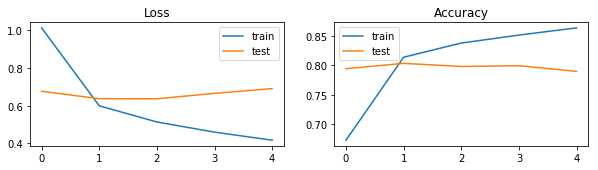

In [32]:
plt.figure(1)
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.title('Loss')
plt.plot(history_des.history['loss'], label='train')
plt.plot(history_des.history['val_loss'], label='test')
plt.legend()
plt.subplot(222)

plt.title('Accuracy')
plt.plot(history_des.history['acc'], label='train')
plt.plot(history_des.history['val_acc'], label='test')
plt.legend()
plt.show();

In [33]:
model_json = final_model.to_json()
with open("final_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
final_model.save_weights("final_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
x_title = title_tokenizer.texts_to_sequences(df['new_title'].values)
x_des = tokenizer_des.texts_to_sequences(df['process_description'].values)
x = np.concatenate((x_title,x_des),axis =1)
x = pad_sequences(x, maxlen=max_seq_len)
print('Shape of data tensor:', x.shape)

In [34]:
final_model = Sequential()
final_model.add(Embedding(max_no_words, embedding, input_length=x.shape[1]))
final_model.add(SpatialDropout1D(0.2))
final_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
final_model.add(Dense(13, activation='softmax'))
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 128

history_des = final_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Train on 68904 samples, validate on 7656 samples
Epoch 1/10
68904/68904 [==============================] - 86s 1ms/step - loss: 1.1469 - acc: 0.6253 - val_loss: 0.6855 - val_acc: 0.7921
Epoch 2/10
68904/68904 [==============================] - 85s 1ms/step - loss: 0.6201 - acc: 0.8096 - val_loss: 0.6354 - val_acc: 0.8019
Epoch 3/10
68904/68904 [==============================] - 85s 1ms/step - loss: 0.5270 - acc: 0.8332 - val_loss: 0.6438 - val_acc: 0.8022
Epoch 4/10
68904/68904 [==============================] - 85s 1ms/step - loss: 0.4681 - acc: 0.8502 - val_loss: 0.6610 - val_acc: 0.7975
Epoch 5/10
68904/68904 [==============================] - 85s 1ms/step - loss: 0.4275 - acc: 0.8605 - val_loss: 0.6863 - val_acc: 0.7904
